# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [2, 52, 102]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6353,8808,7684,2405,3516,7844
1,40721,3916,5876,532,2587,1278
2,2932,6459,7677,2561,4573,1386


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

For the first customer(index=2), the spending on the Milk and Delicatessen is much higher than the mean value. So I guess it is a retailer or convenient store which sells well-made food to office workers or students. 

For the second customer(index=52), the fresh is much higher than the mean value, which is also greater the 75% point. So I guess it is a market selling fresh food or a restaurant which need fresh to cook. 

For the third customer(index=102), this customer spends about an average amount on all categories. This could correspond to an average-sized mom-and-pop store selling various kinds of food.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import r2_score
from sklearn.grid_search import GridSearchCV

'''
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data=data;
y_all = data['Detergents_Paper']
new_data = new_data.drop( 'Detergents_Paper', axis = 1 )
# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split (new_data, y_all, test_size=0.25,  random_state=30)

# TODO: Create a decision tree regressor and fit it to the training set
parameters = {'max_depth': list(range(1,11))}
cv_sets = ShuffleSplit(X_train.shape[0], n_iter = 10, test_size = 0.20, random_state = 30)
regressor = DecisionTreeRegressor(random_state=30)
scoring_fnc = make_scorer(r2_score)

grid_obj = GridSearchCV(regressor, parameters, scoring = scoring_fnc, cv = cv_sets)
grid_obj = grid_obj.fit(X_train, y_train)
regressor = grid_obj.best_estimator_

#regressor.fit(X_train, y_train)
#y_pred = regressor.predict(X_test)
# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print "The R^2 score is {}".format(score)
print "Parameter 'max_depth' is {} for the optimal model.".format(regressor.get_params()['max_depth'])
'''

# now we use a for-loop to examinate all the features. 
def predict_feature(feature):
    new_data=data;
    y_all = data[feature]
    new_data = new_data.drop( [feature], axis = 1 )
    X_train, X_test, y_train, y_test = train_test_split (new_data, y_all, test_size=0.25,  random_state=30)


    parameters = {'max_depth': list(range(1,11))}
    cv_sets = ShuffleSplit(X_train.shape[0], n_iter = 10, test_size = 0.20, random_state = 30)
    regressor = DecisionTreeRegressor(random_state=30)
    scoring_fnc = make_scorer(r2_score)

    grid_obj = GridSearchCV(regressor, parameters, scoring = scoring_fnc, cv = cv_sets)
    grid_obj = grid_obj.fit(X_train, y_train)
    regressor = grid_obj.best_estimator_

    score = regressor.score(X_test, y_test)
    print "The R^2 score is for feature {:16} is {:+.5f}".format(feature, score)
    print "Parameter 'max_depth' is {} for the optimal model.".format(regressor.get_params()['max_depth'])
    
for feature in data.columns.values:
    predict_feature(feature)


The R^2 score is for feature Fresh            is +0.04663
Parameter 'max_depth' is 1 for the optimal model.
The R^2 score is for feature Milk             is +0.61613
Parameter 'max_depth' is 5 for the optimal model.
The R^2 score is for feature Grocery          is +0.48663
Parameter 'max_depth' is 5 for the optimal model.
The R^2 score is for feature Frozen           is +0.18476
Parameter 'max_depth' is 1 for the optimal model.
The R^2 score is for feature Detergents_Paper is +0.73297
Parameter 'max_depth' is 3 for the optimal model.
The R^2 score is for feature Delicatessen     is +0.11087
Parameter 'max_depth' is 1 for the optimal model.


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**
Actually, I predict all the features. The Detergents_Paper has the highest R^2 score(0.73297), which may be dropped. The spending on the detergents_papers may highly depend on the spending on the other products which may determine the size of the store. Therefore, it may not be relevant in identifying customer's spending habits. The higher the R2, the more irrelevant it is. 

The other two features Milk and Grocery also have relatively high R^2 score. They may also stongly depend on other features. This somehow tells us that the Detergents_paper, Milk and Grocery may be correlated to each other.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

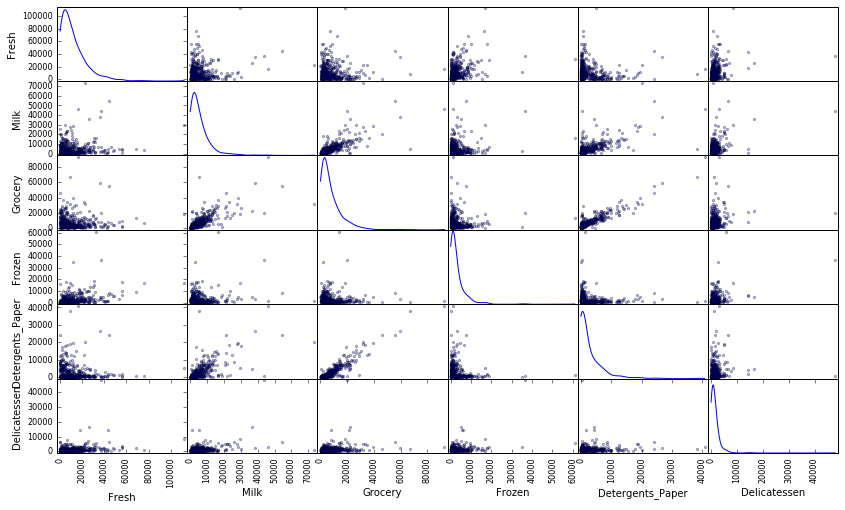

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

In [6]:
display(data.mean())
display(data.median())

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Delicatessen         965.5
dtype: float64

**Answer:** 
There are three pairs of features may have correlation. 

I. Grocery and Detergents_paper.

II. Grocery and Milk. 

III. Milk and Detergents_paper

Actually, the three features: grocery, detergents_paper and milk may correlate to each other. It confirms my suspicious about the relevance of the features I predicted before. Actually, there three features have the highest three R^2 scores computed in Question 2. 

#### How is the data for those features distributed? 
I listed the mean values and the median values of all the categories above. We can easily find that all the mean values are larger than the median values. The data is normally distributed due to the presence of many outliers. Evidently, most are skewed to the left where most of the data points lie. This indicates how normalization is required to make the data features normally distributed as clustering algorithms require them to be normally distributed.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

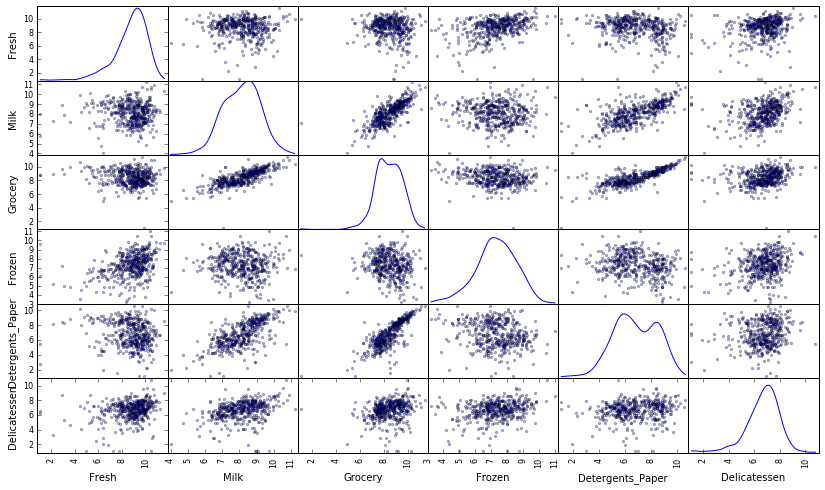

In [7]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [8]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
1,10.614499,8.272826,8.678632,6.276643,7.858254,7.153052
2,7.983440,8.773230,8.945984,7.848153,8.427925,7.234177


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [9]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25, interpolation='linear')
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75, interpolation='linear')
 
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "The step size is {}".format(step)
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [128, 65, 66, 75, 154]  ### these points show up in more than 1 outliers

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

The step size is 2.53350786861
Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


The step size is 2.31824827282
Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


The step size is 2.3988562138
Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


The step size is 2.34932750101
Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


The step size is 4.08935876094
Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


The step size is 2.24228065442
Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**
The date points with indices [65, 66, 75, 128, 154] show up in the outliers of more than 1 features. I would like to remove these points from the dataset, since the presence of outliers can often skew results which take into consideration these data points.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

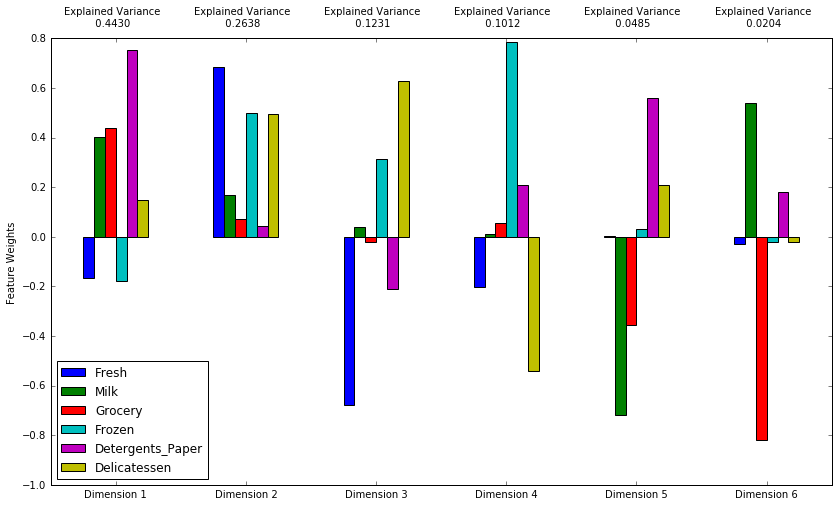

In [10]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

0.7068 variance in the data is explained in total by the first and second pricipal component. 

0.9311 variance in the data is explained in total by the first four principal components. 

#### At first I thought that each of the first four PCA dimensions represent a specific type of customer, which are:
Component 1: Detergents_Paper has the significant positive weight, the Milk and Grocery have meaningful positive weights. This component may be described as the characteristic of the grocery store or retail store. 

Component 2: Fresh has significant positive weight, fronzen and delicatessen have meaningful positive weights. This component may be described as the characteristic of the restaurants or deli food market. 

Component 3: Delicatessen has significant positive weight. Frozen has meaningful weight. Fresh has significant negative weight. This component somehow seems similar to the Component 2. It may be described as the characteristic of some special restaurants or deli food market. 

Component 4: Frozen has significant positive weight. Delicatessen has meaningful weight. This component may be described as the characteristic of frozen food market. 

#### However, based on the feedback from the reviewer, I know this may not be correct. 
Each PCA dimensions represent an axis in the new space and each customer is a linear combination of all the PCA dimension. 

In the component 1, Detergents_Paper has the significant positive weight, and the Milk and Grocery have meaningful positive weights. This is in line with our initial findings where the 3 features are highly correlated. The second dimension appears to be orthogonal to the first, reducing the impact of Milk, Grocery, and Detergents, and instead relying on variation in Fresh, Frozen, and Deli items. The third dimension appears to be low Fresh spending and high Deli spending, and the 4th is a similar high/low continuum for low Deli, high Frozen.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [11]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.8834,1.5991,1.3204,-0.5432,0.3934,0.3117
1,0.8957,1.0542,-1.5162,-1.2133,0.4758,0.0506
2,1.8145,0.2029,0.7064,0.6552,0.4010,0.2483


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [12]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [13]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.8834,1.5991
1,0.8957,1.0542
2,1.8145,0.2029


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

Advantages of K-Means: converge fast; if variables are huge, then  K-Means most of the times computationally faster than other clustering methods, if we keep k smalls; K-Means produce tighter clusters than hierarchical clustering, especially if the clusters are globular.

Advantages of GMM: In general, the advantange of Gaussian Mixture Models (GMMs) over k-means is that GMMs deliver a soft-assignment of clusters. That is, each data point is assigned a probability for each cluster, indicating how likely it belongs to the cluster. K-means only provides hard assignments, i.e., it chooses a single cluster for each data point. GMMs can also fit more complex cluster shapes since each mixture component can freely fit its covariance matrix. 

For this wholesale customer segmenting problem, since there may be a mixed membership in our dataset where there is no clear demarcation, I think we should start with the Gaussian Mixture Model. I also want to apply the K-Means mathods and compare the performance of these two methods. 



### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

### GMM Implementation

In [14]:
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score

def cluster_GMM(data, num_clu):
    # TODO: Apply your clustering algorithm of choice to the reduced data
    clusterer = GMM(n_components=num_clu).fit(data)
    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(data)
    # TODO: Find the cluster centers
    centers = clusterer.means_
    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)
    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(data, preds)
    
    return score, preds, centers, sample_preds

for num_clusters in range(2,11):
    score, preds, _, _ = cluster_GMM(reduced_data, num_clusters)
    print("GMM num_clusters: {} - score: {}".format(num_clusters, score))
    

#opt_num_clusters = 2   
#score, preds, centers, sample_preds = cluster_GMM(reduced_data, opt_num_clusters)


GMM num_clusters: 2 - score: 0.411818864386
GMM num_clusters: 3 - score: 0.37513463899
GMM num_clusters: 4 - score: 0.333312614888
GMM num_clusters: 5 - score: 0.281805415485
GMM num_clusters: 6 - score: 0.277015198008
GMM num_clusters: 7 - score: 0.326065661483
GMM num_clusters: 8 - score: 0.310453413564
GMM num_clusters: 9 - score: 0.270167890294
GMM num_clusters: 10 - score: 0.276932943595


### KMeans Implementation

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def cluster_KMeans(data, num_clu):
    # TODO: Apply your clustering algorithm of choice to the reduced data
    clusterer = KMeans(n_clusters=num_clu, init='k-means++', n_init=10).fit(data)
    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(data)
    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_
    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)
    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(data, preds)
    
    return score, preds, centers, sample_preds

for num_clusters in range(2,11):
    score, preds, _, _ = cluster_KMeans(reduced_data, num_clusters)
    print("KMeans num_clusters: {} - score: {}".format(num_clusters, score))


#opt_num_clusters = 2   
#score, preds, centers, sample_preds = cluster_KMeans(reduced_data, opt_num_clusters)

KMeans num_clusters: 2 - score: 0.426281015469
KMeans num_clusters: 3 - score: 0.397423420008
KMeans num_clusters: 4 - score: 0.332747097118
KMeans num_clusters: 5 - score: 0.337765835687
KMeans num_clusters: 6 - score: 0.361798752588
KMeans num_clusters: 7 - score: 0.364495201493
KMeans num_clusters: 8 - score: 0.364293812404
KMeans num_clusters: 9 - score: 0.350797026656
KMeans num_clusters: 10 - score: 0.360765767283


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** 

For both the GMM and KMeans method, I tried to change the cluster number from 2 to 10. The scores are between 0.3 to 0.43. For both of these two methods, when the cluster number is 2, it has the best sihouette score. Therefore, I would choose 2 clusters to classify the data. 

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

### Visualization - GMM method

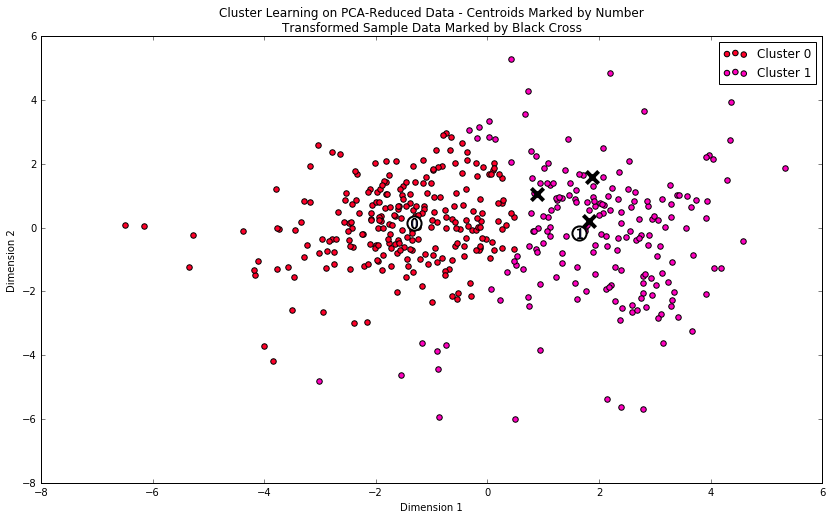

In [16]:
opt_num_clusters = 2
score, preds, centers, sample_preds = cluster_GMM(reduced_data, opt_num_clusters)
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Visualization - KMeans method

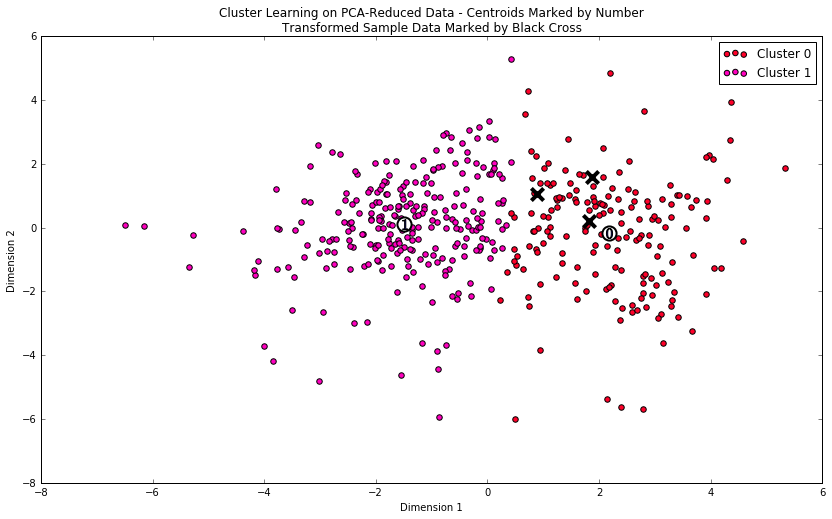

In [17]:
score_KM, preds_KM, centers_KM, sample_preds_KM = cluster_KMeans(reduced_data, opt_num_clusters)
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds_KM, centers_KM, pca_samples)

### Comparisons of KMeans and GMM Performance
From the two figures above we find that the classifications by the two different methods seem a litte bit differnt. The classification by the KMeans method seems have a hard line between the two clusters. The data points on the left side belong to one cluster, and the data points on the right side belong to the other cluster. However, for the result in the GMM classifier, there are some points on the left hand side also belong to the right-side cluster. It shows the soft-assignment property of the GMM method. 

All in all, these two methods have the similar performance. In the following content, we will use the results from the GMM method. 

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [18]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8812.0,2052.0,2689.0,2058.0,337.0,712.0
Segment 1,4316.0,6347.0,9555.0,1036.0,3046.0,945.0


In [19]:
display(true_centers - data.median())  # Compare the centers with the median of the data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,308.0,-1575.0,-2066.5,532.0,-479.5,-253.5
Segment 1,-4188.0,2720.0,4799.5,-490.0,2229.5,-20.5


In [20]:
display(true_centers - data.mean()) # Compare the centers with the mean of the data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-3188.297727,-3744.265909,-5262.277273,-1013.931818,-2544.493182,-812.870455
Segment 1,-7684.297727,550.734091,1603.722727,-2035.931818,164.506818,-579.870455


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

We will be using deviations from the median, with reference to the statistical description of the dataset at the beginning of this project, since mean is sensitive to outliers and would not yield meaningful comparisons. As we can see, it is not meaningful to compare the center of Segment 0 with the mean value, since all the values are less than the mean values. 

From the comparisons with median values of the data, we may conclude that:

Segment 0: Above-median spending on Fresh and Frozen. This category may represent the markets selling fresh(vagetables) and frozen food(seafood) or a restaurant which need fresh to cook.

Segment 1: Above-median spending on Milk, Grocery, Detergents_paper. This category may represent the grocery stores, retail stores or cafes.  


### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [21]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


**Answer:**
All the sample points I choose are predicted to be in Cluster 1.

#### My initial guesses for the three samples are:
##### For the first customer(index=2).
The spending on the Milk and Delicatessen is much higher than the mean value. So I guess it is a retailer or convenient store which sells well-made food to office workers or students.
##### For the second customer(index=52)
The fresh is much higher than the mean value, which is also greater the 75% point. So I guess it is a market selling fresh food or a restaurant which need fresh to cook.
##### For the third customer(index=102)
This customer spends about an average amount on all categories. This could correspond to an average-sized mom-and-pop store selling various kinds of food.

#### Analysis
The first customer evidently belongs to the Cluster 1, it spends above-median money on Milk and Delicatessen. Now it is assigned to the cluster which I consider grocery stores or retail stores. For this data points, my prediction wa therefore in line with the clustering.

The second customer spends a lot money on the Fresh. My first guess was this would be a restsurant. However, now it is assigned to the cluster which I consider to be grocery store. For this data points, my prediction was not in line with the clustering. Maybe it is on the boundary area of the two clusters. 

The third customer was first guessed to be a store sells various kinds of thing. Now it is assigned to the cluster which I consider to be grocery store. For this data points, my prediction somehow was in line with the clustering.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

The first changing strategy is to reduce the delivery frequency for customers segment 1 since it is not ordering a lot of fresh food. Since fresh food should be fresh and therefore delivered often, these customers would likely react negative to reduced delivery frequency. Customers from segment 1 may not care that much (provided they can store a sufficient amount of food). But the customer in Segment 0 would have a substantial impact by the change in delivery service. This is because their products are highly perishable such as "Fresh" products including fruits, vegetables, seafood and meat.

In order to learn the impact, the wholesale distributor can run some A/B tests experiments. 

We randomly pick up 2 sets of customers from each of the two segments. We numerate them in the order 0a, 0b, 1a, 1b. 
0a, 0b are the two sets from Segment 0. 1a, 1b are the two sets from Segment 1. 

We will change the delivery schedules for group 0a and 1a keeping the schedules for 0b and 1b unchanged.

After two weeks of experiments, we talk to the selected customers and ask for their happyness will provide a quantitataive score of customer satisfaction. And we can also monitor their spending on different categories to see whether some of them will decrease or not. 

Clients experiencing a negative impact would have a low satisfaction level and a decreased or similar spending. And clients experiencing a positive impact would have a high satisfaction level and an increased or similar spending.




### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

Since we already have the labels(even through they are predicted) for the orignal customers, we can use the SVM, GNB, logistic regression or some other supervised learning models to train datas based on their spending on different categories. Then we use the model to classify the new clients based on their feasures(spending on each category). The target variable will be the index of the cluster group (0 or 1 in this probelm.)

Another way I can come up with is that, we compute the distance between the features of the new clients to the centers of each cluters and then pick up the closest cluster as the classification of the new client. Or in the GMM model, we only perform these E-steps for the new data points to include them into the clustering. 



### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

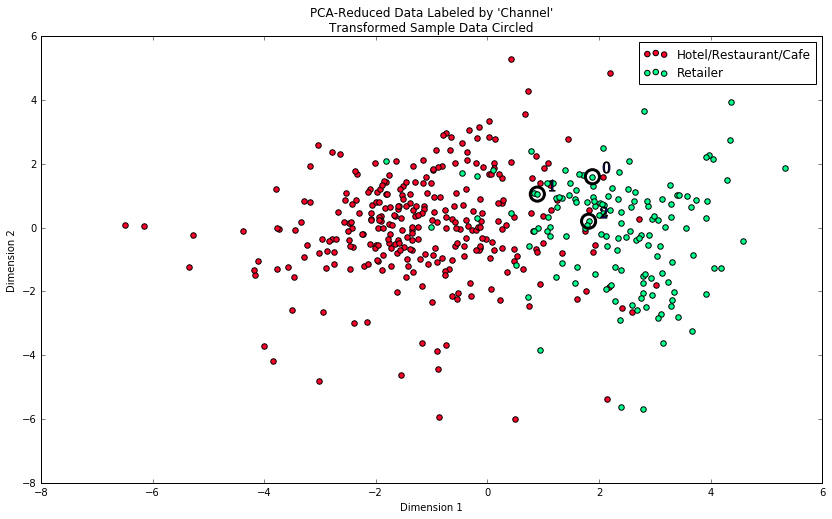

In [22]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

The number of clusters is consistent with the underlying distribution with 2 major clusters hence the clustering algorithm did well.

There are customer segments that would be purely classified as "Retailers" or "Hotels/"Restaurants/Cafes" on the extreme left and right accordingly. However most data points though are somewhat ambiguous and do not clearly belong to one cluster or the other. There is considerable overlap in the true distribution.

This underlying classification is consistent with our observation where we noted cluster 0 customers are typically restaurants and cluster 1 customers are typically grocery stores or retail stores.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.